<a href="https://colab.research.google.com/github/Siryeong/MachineLearning/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cats and dogs

In [ ]:
!unzip drive/MyDrive/cats_and_dogs_small.zip

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = './cats_and_docs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
 weights='imagenet',
 include_top=False,
 input_shape=(150,150,3)
)
conv_base.summary()

In [ ]:
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest',
 )
test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되면 안됨
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150,150),
 batch_size=32,
 class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150,150),
 batch_size=32,
 class_mode='binary'
)

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
 if layer.name == 'block5_conv1':
  set_trainable = True
 if set_trainable:
  layer.trainable = True
 else:
  layer.trainable = False
model.compile(
 loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-5),
 metrics=['acc']
)
history = model.fit_generator(
 train_generator,
 steps_per_epoch=60,
 epochs=100,
 validation_data=validation_generator,
 validation_steps=50
)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 레모네이드

In [ ]:
import tensorflow as tf
import pandas as pd

# data 준비하기
path = "https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/lemonade.csv"
lemon = pd.read_csv(path)
lemon.head()

,온도,판매량
0,20,40
1,21,42
2,22,44
3,23,46
4,24,48


In [ ]:
# 종속변수, 독립변수
trainX = lemon[["온도"]]
trainY = lemon[["판매량"]]
print(trainX.shape, trainY.shape)

(6, 1) (6, 1)


In [ ]:
 # 모델 정의하기
X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
model.fit(trainX, trainY, epochs=1000, verbose=0);
model.fit(trainX, trainY, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 5ms/step - loss: 5.6955e-04
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 5.6903e-04
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 5.6857e-04
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 5.6808e-04
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 5.6763e-04
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 5.6727e-04
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 5.6695e-04
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 5.6661e-04
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 5.6631e-04
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 5.6600e-04


In [ ]:
model.predict([[15]])

array([[30.084]], dtype=float32)

# 보스턴 집값 예측

In [ ]:
import tensorflow as tf
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv"
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
독립 = data[["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b" ,"lstat"]]
종속 = data[["medv"]]
print(독립.shape, 종속.shape)

(506, 13) (506, 1)


In [ ]:
x = tf.keras.layers.Input(shape=[13])
y = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(x, y);
model.compile(loss='mse')

In [ ]:
model.fit(독립, 종속, epochs=1000, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 23.1654
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 23.7125
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 23.9938
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 23.4152
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 23.4187
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 24.1541
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 23.5132
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 23.5718
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 23.1328
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 23.6260


In [ ]:
model.predict([[독립[0:5]]])

array([[30.173801],
       [25.036583],
       [31.455845],
       [30.002222],
       [29.609077]], dtype=float32)

In [ ]:
종속[0:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# 아이리스 품종 분류 히든레이어

In [ ]:
import tensorflow as tf
import pandas as pd
path = "https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv"
data = pd.read_csv(path)
data = pd.get_dummies(data)
print(data.columns)
data.head()

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')


,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [ ]:
독립 = data[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속 = data[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(독립.shape, 종속.shape)

(150, 4) (150, 3)


In [ ]:
x = tf.keras.layers.Input(shape=[4])
h = tf.keras.layers.Dense(8, activation='swish')(x)
h = tf.keras.layers.Dense(8, activation='swish')(h)
h = tf.keras.layers.Dense(8, activation='swish')(h)
y = tf.keras.layers.Dense(3, activation='softmax')(h)
model = tf.keras.models.Model(x, y)
model.compile(loss='categorical_crossentropy', metrics='acc')

In [ ]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 27        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(독립, 종속, epochs=1000, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0524 - acc: 0.9733
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0505 - acc: 0.9800
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0436 - acc: 0.9933
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0562 - acc: 0.9800
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0489 - acc: 0.9800
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0508 - acc: 0.9667
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0635 - acc: 0.9667
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0459 - acc: 0.9867
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0527 - acc: 0.9733
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0515 - acc: 0.9733


In [ ]:
model.predict(독립[-5:])

array([[1.3791892e-21, 1.1132610e-03, 9.9888676e-01],
       [6.0509136e-19, 7.3482534e-03, 9.9265176e-01],
       [6.8453273e-20, 7.1724462e-03, 9.9282759e-01],
       [3.9739392e-23, 4.2597714e-04, 9.9957401e-01],
       [8.5447571e-19, 1.7650282e-02, 9.8234969e-01]], dtype=float32)

In [ ]:
종속[-5:]

,품종_setosa,품종_versicolor,품종_virginica
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1
149,0,0,1


In [ ]:
model.get_weights()

[array([[  1.9264195,   0.7536855,  -1.0763401],
        [  6.4438276,   1.3147166,  -1.8026181],
        [ -8.16139  ,  -1.4270983,   1.6912552],
        [-10.833769 ,  -3.2295976,   3.6796327]], dtype=float32),
 array([ 4.3895826,  2.5949173, -3.748415 ], dtype=float32)]

# 보스턴 집값 히든레이어

In [ ]:
import tensorflow as tf
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv"
보스턴 = pd.read_csv(path)
print(보스턴.columns)
보스턴.head()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
독립 = 보스턴[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
종속 = 보스턴[['medv']]
print(독립.shape, 종속.shape)

(506, 13) (506, 1)


In [ ]:
x = tf.keras.layers.Input([13])

h = tf.keras.layers.Dense(10)(x)
h = tf.keras.layers.BatchNormalization()(h)
h = tf.keras.layers.Activation('swish')(h)

h = tf.keras.layers.Dense(10)(h)
h = tf.keras.layers.BatchNormalization()(h)
h = tf.keras.layers.Activation('swish')(h)

h = tf.keras.layers.Dense(10)(h)
h = tf.keras.layers.BatchNormalization()(h)
h = tf.keras.layers.Activation('swish')(h)

y = tf.keras.layers.Dense(1)(h)
model = tf.keras.models.Model(x, y)
model.compile(loss='mse')

In [ ]:
model.summary()

In [ ]:
model.fit(독립, 종속, epochs=1000, verbose=0)
model.fit(독립, 종속, epochs=10)

In [ ]:
model.predict(독립[0:5])

array([[26.209492],
       [23.849335],
       [33.188805],
       [32.1012  ],
       [32.499012]], dtype=float32)

In [ ]:
종속[0:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# MNIST

## 데이터 불러오기

In [11]:
# 데이터 불러오기
from tensorflow.keras import datasets
import pandas as pd

(독립, 종속), _ = datasets.mnist.load_data()
print(독립.shape, 종속.shape) # 모양 확인
종속 = pd.get_dummies(종속) # 원핫 인코딩

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


<bound method NDFrame.head of        0  1  2  3  4  5  6  7  8  9
0      0  0  0  0  0  1  0  0  0  0
1      1  0  0  0  0  0  0  0  0  0
2      0  0  0  0  1  0  0  0  0  0
3      0  1  0  0  0  0  0  0  0  0
4      0  0  0  0  0  0  0  0  0  1
...   .. .. .. .. .. .. .. .. .. ..
59995  0  0  0  0  0  0  0  0  1  0
59996  0  0  0  1  0  0  0  0  0  0
59997  0  0  0  0  0  1  0  0  0  0
59998  0  0  0  0  0  0  1  0  0  0
59999  0  0  0  0  0  0  0  0  1  0

[60000 rows x 10 columns]>


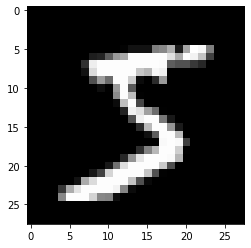

In [12]:
# 이미지 확인
import matplotlib.pyplot as plt

print(종속.head)
plt.imshow(독립[0], cmap='gray')

## 모델 구성하기

### reshape

In [ ]:
# 모델 구성하기 reshape
import tensorflow as tf
from tensorflow import keras

독립 = 독립.reshape(60000, 784)

x = keras.layers.Input(shape=[784])
h = keras.layers.Dense(84, activation='swish')(h)
y = keras.layers.Dense(10, activation='softmax')(h)
model = keras.models.Model(x, y)
model.compile(loss='categorical_crossentropy', metrics='acc')

### flatten

In [55]:
# 모델 구성하기 flatten
import tensorflow as tf
from tensorflow import keras

x = keras.layers.Input(shape=[28, 28])
h = keras.layers.Flatten()(x)
h = keras.layers.Dense(84, activation='swish')(h)
y = keras.layers.Dense(10, activation='softmax')(h)
model = keras.models.Model(x, y)
model.compile(loss='categorical_crossentropy', metrics='acc')

### conv2D

In [8]:
# 모델 구성하기 conv2D
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, Flatten, Dense
from keras import models

## reshape
독립 = 독립.reshape(60000, 28, 28, 1)

## 모델 정의
x = Input(shape=[28, 28, 1])
h = Conv2D(3, kernel_size=5, activation='swish')(x)
h = Conv2D(6, kernel_size=5, activation='swish')(h)
h = Flatten()(h)
h = Dense(84, activation='swish')(h)
y = Dense(10, activation='softmax')(h)

model = models.Model(x, y)
model.compile(loss = 'categorical_crossentropy', metrics='acc')

###MaxPooling

In [10]:
# 모델 구성하기 MaxPool
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, Flatten, Dense, MaxPool2D
from keras import models

## reshape
독립 = 독립.reshape(60000, 28, 28, 1)

## 모델 정의
x = Input(shape=[28, 28, 1])
h = Conv2D(3, kernel_size=5, activation='swish')(x)
h = MaxPool2D()(h)
h = Conv2D(6, kernel_size=5, activation='swish')(h)
h = MaxPool2D()(h)
h = Flatten()(h)
h = Dense(84, activation='swish')(h)
y = Dense(10, activation='softmax')(h)

model = models.Model(x, y)
model.compile(loss = 'categorical_crossentropy', metrics='acc')

### Lenet

In [17]:
# 모델 구성하기 Lenet
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, Flatten, Dense, MaxPool2D
from keras import models

## reshape
독립 = 독립.reshape(60000, 28, 28, 1)

## 모델 정의
x = Input(shape=[28, 28, 1])
h = Conv2D(3, kernel_size=5, padding='same',activation='swish')(x)
h = MaxPool2D()(h)
h = Conv2D(16, kernel_size=5, activation='swish')(h)
h = MaxPool2D()(h)
h = Flatten()(h)
h = Dense(84, activation='swish')(h)
y = Dense(10, activation='softmax')(h)

model = models.Model(x, y)
model.compile(loss = 'categorical_crossentropy', metrics='acc')

In [18]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 3)         78        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        1216      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)                3368

## 모델 학습시키기

In [12]:
# 모델 학습하기
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 4ms/step - loss: 2.7185 - acc: 0.7810
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1292 - acc: 0.9622
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1000 - acc: 0.9713
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0832 - acc: 0.9762
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0744 - acc: 0.9776
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0711 - acc: 0.9788
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0675 - acc: 0.9816
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0655 - acc: 0.9821
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0614 - acc: 0.9821
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0629 - acc: 0.9821


## 모델 사용하기

In [12]:
# 모델 사용하기
import pandas as pd

result = model.predict(독립[0:5])
pd.DataFrame(result).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.04,0.0,0.96,0.0,0.0,0.0,0.00
1,1.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.00,1.0,0.00,0.0,0.0,0.0,0.00
3,0.0,1.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.99


In [11]:
종속[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [ ]:
model.summary()

# CIFAR10

##데이터 불러오기

In [1]:
# 데이터 불러오기
import tensorflow as tf
from tensorflow.keras import datasets
import pandas as pd

(독립, 종속), _ = datasets.cifar10.load_data()
print(독립.shape, 종속.shape)

종속 = pd.get_dummies(종속.reshape(50000))
print(독립.shape, 종속.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


In [ ]:
# 데이터 확인
import matplotlib.pyplot as plt
print(종속[0])
plt.imshow(독립[0])

##모델 구성하기

In [10]:
# LeNet 5 구조로 모델 구성하기

import tensorflow.keras
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D
from keras import models

x = Input(shape=[32, 32, 3])
h = Conv2D(6, kernel_size=5, activation='swish')(x)
h = MaxPool2D()(h)
h = Conv2D(16, kernel_size=5, activation='swish')(h)
h = MaxPool2D()(h)

h = Flatten()(h)
h = Dense(120, activation='swish')(h)
h = Dense(84, activation='swish')(h)
y = Dense(10, activation='softmax')(h)

model = models.Model(x, y)
model.compile(loss='categorical_crossentropy', metrics='acc')

In [ ]:
model.summary()

## 모델 학습하기

In [ ]:
model.fit(독립, 종속, epochs=100)